# NWB widget example

Working with this code:

Open up a terminal and enter the following 

        conda create -n env python=3.9
        conda activate env
        pip install numpy scipy matplotlib pandas ipykernel pynwb nwbwidgets jupyterlab

Restart terminal and enter the following:

        conda activate env
        jupyter lab

When jupyter-lab fires up:
1) Press on "Python 3 (ipykernel)" and hit the "select" button before running any of these lines

Just hit shift+enter to run a cell

---

####  Import some packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pynwb import NWBHDF5IO, NWBFile

#### A helper function to read NWB files

In [3]:
# some general helper functions for nwb stuff
def read_nwb(pathname: str):
    """
        Read NWB files
        Args:
            >>> nwbpath: path directly to the nwb file pathname="Users/.../nwbfile.nwb"
    """
    io = NWBHDF5IO(pathname, mode="r")
    nwb_file = io.read()

    return nwb_file

#### Load in data and visualize

* Change `filepath` to wherever you downloaded the nwbfile

In [4]:
# change me
filepath = '/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS/nwbfile.nwb'
nwbfile = read_nwb(filepath)

### NWBwidgets

Press on the 'acquisition' drop down menu and you can explore the LFP data (try the group inputs in the drop down menu)

Also, you can press on the 'units' menu and see example rasters. Not everything works here yet

In [ ]:
from nwbwidgets import nwb2widget
nwb2widget(nwbfile)

AttributeError: 'UnitsAndTrialsControllerWidget' object has no attribute 'controls'

AttributeError: 'UnitsAndTrialsControllerWidget' object has no attribute 'controls'

AttributeError: 'UnitsAndTrialsControllerWidget' object has no attribute 'controls'

AttributeError: 'UnitsAndTrialsControllerWidget' object has no attribute 'controls'

AttributeError: 'UnitsAndTrialsControllerWidget' object has no attribute 'controls'

## Accessing components of NWB to plot

In [6]:
# numpy array of LFP data
LFP_data = nwbfile.acquisition['ElectricalSeries'].data[:]

# define sampling rate
fs = 32000

print("Signal on Y, Wire on X", LFP_data.shape)

Signal on Y, Wire on X (40848770, 16)


Text(0, 0.5, 'Voltage')

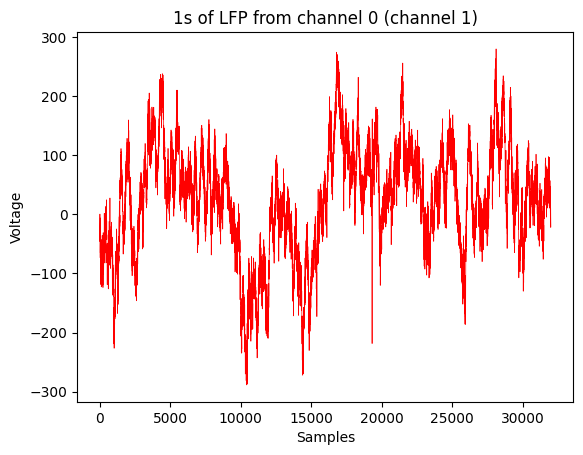

In [7]:
# example figure
plt.plot(LFP_data[0:fs,0], color = 'r', linewidth = 0.5)
plt.title("1s of LFP from channel 0 (channel 1)")
plt.xlabel("Samples")
plt.ylabel("Voltage")

## Here is an example function that I made for visualizing. Quite like the NWB file tool

In [50]:
# lets inherit the __init__ from process_signal
def lfp_plotter(csc_data, fs, time_range: list = [0, 1], color = None):

    """
    Generate plotting function that plots as many rows as there are signals

    Args:
        >>> csc_data: numpy array of LFP data (samples on rows, wire on cols)
        >>> time_range: list telling the figure what to plot. Default is the first second.
        >>> fs: sampling rate of data

    Optional Args:
        >>> color: default is a single value, 'k'. This can take as many colors as there are data points.

    """
    # get shape of csc_data
    csc_shape = csc_data.shape
    if csc_shape[0] < csc_shape[1]:
        KeyError("Invert your csc_data shape. Make sure samples is on the row dimension")

    # get csc_data
    if color is None:
        temp_color = 'k'
        color = [temp_color[0] for i in range(csc_shape[1])]

    # get sampling rate - this method and class will be inherited by ioreaders
    fig, axes = plt.subplots(nrows=csc_shape[1],ncols=1,)
    idx = [int(time_range[0]*fs),int(time_range[1]*fs)]
    x_data = np.linspace(time_range[0],time_range[1],int(fs*(time_range[1]-time_range[0])))
    for i in range(csc_shape[1]):
        if len(axes) > 1:
            if i == csc_shape[1]-1:
                axes[i].plot(x_data, csc_data[idx[0]:idx[1],i],color[i],linewidth=0.5)
                axes[i].set_xlabel("Time (sec)")
            else:
                axes[i].plot(x_data, csc_data[idx[0]:idx[1],i],color[i],linewidth=0.5)
                #axes[i].xlabel("Time (sec)")
            axes[i].yaxis.set_tick_params(labelsize=8)
            axes[i].xaxis.set_tick_params(labelsize=8)
        else:
            axes.plot(x_data, csc_data[idx[0]:idx[1],i],color[i],linewidth=0.5)
            axes.set_xlabel("Time (sec)")  
            axes.yaxis.set_tick_params(labelsize=8)
            axes.xaxis.set_tick_params(labelsize=8)                              
        #var(axes[i])
    fig.show()

/var/folders/f3/11w5x6bs32gd1xc4lh41qdnr0000gp/T/ipykernel_36128/3526212499.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


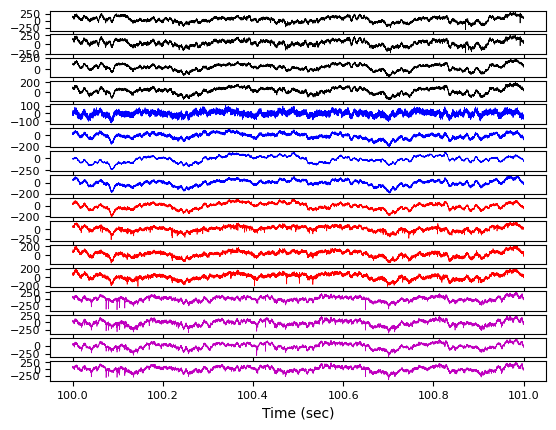

In [55]:
# Using the tool. Just change time_range to whatever you want
time_range = [100, 101] # in seconds
colors = None
colors = ['k','k','k','k','b','b','b','b','r','r','r','r','m','m','m','m']
lfp_plotter(csc_data = LFP_data, fs = fs, time_range = time_range, color = colors)